In [1]:
library("survival")
library("coxphMIC")
library("survminer")

Loading required package: ggplot2

Loading required package: ggpubr



In [ ]:
#urlPackage <- "https://cran.r-project.org/src/contrib/Archive/randomForest/randomForest_4.6-12.tar.gz"

In [ ]:
#install.packages(urlPackage, repos=NULL, type="source",lib='/home/hshadman/R/x86_64-pc-linux-gnu-library/3.5')

In [ ]:
#urlPackage <- "https://cran.r-project.org/src/contrib/Archive/randomForestSRC/randomForestSRC_2.9.3.tar.gz"

In [ ]:
#install.packages(urlPackage, repos=NULL, type="source",lib='/home/hshadman/R/x86_64-pc-linux-gnu-library/3.5')

In [ ]:
#urlPackage <- "https://cran.r-project.org/src/contrib/Archive/ClusterR/ClusterR_1.2.5.tar.gz"
#install.packages(urlPackage, repos=NULL, type="source",lib='/home/hshadman/R/x86_64-pc-linux-gnu-library/3.5')

In [2]:
library('randomForest')

randomForest 4.6-12

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin




In [3]:
library("randomForestSRC")


 randomForestSRC 2.9.3 
 
 Type rfsrc.news() to see new features, changes, and bug fixes. 
 




In [4]:
library('ClusterR')

Loading required package: gtools



In [5]:
library('cluster')

In [6]:
library('scatterplot3d')

In [7]:
integrin=read.csv("integrin_data_with_sample_survival_info.txt",sep='\t')

In [8]:
dim(integrin)

[1] 1218  231

In [9]:
integrin.ge=integrin[,2:28]

In [10]:
clusters <- hclust(dist(t(integrin.ge)))

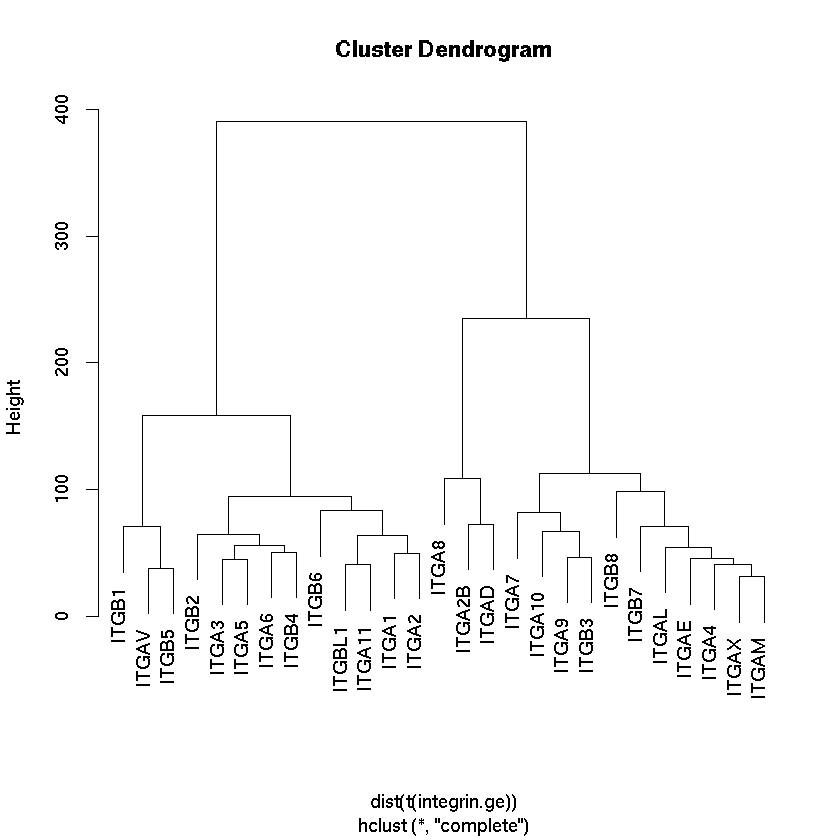

In [11]:
p1 <- plot(clusters)


In [12]:
covariates <- colnames(integrin[,2:28])

In [13]:
univ_formulas.DSS <- sapply(covariates,function(x) as.formula(paste('Surv(DSS.time,DSS)~', x)))

In [14]:
univ_models.DSS <- lapply(univ_formulas.DSS, function(x){coxph(x, data = integrin)})

In [15]:
univ_results.DSS <- lapply(univ_models.DSS, 
                       function(x){  
                          x <- summary(x) 
                          p.value<-signif(x$wald["pvalue"], digits=2) 
                          wald.test<-signif(x$wald["test"], digits=2) 
                          beta<-signif(x$coef[1], digits=2);#coeficient beta 
                          HR <-signif(x$coef[2], digits=2);#exp(beta) 
                          HR.confint.lower <- signif(x$conf.int[,"lower .95"], 2) 
                          HR.confint.upper <- signif(x$conf.int[,"upper .95"],2) 
                          HR <- paste0(HR, " (",  
                                       HR.confint.lower, "-", HR.confint.upper, ")") 
                          res<-c(beta, HR, wald.test, p.value) 
                          names(res)<-c("beta", "HR (95% CI for HR)", "wald.test",  
                                        "p.value") 
                          return(res) 
                          #return(exp(cbind(coef(x),confint(x)))) 
                         }) 
res.DSS <- t(as.data.frame(univ_results.DSS, check.names = FALSE)) 
as.data.frame(res.DSS)

,beta,HR (95% CI for HR),wald.test,p.value
,<fct>,<fct>,<fct>,<fct>
ITGA8,0.054,1.1 (0.95-1.2),0.91,0.34
ITGA9,0.0065,1 (0.88-1.2),0.01,0.92
ITGA1,0.25,1.3 (1.1-1.5),6.6,0.0099
ITGA2,-0.033,0.97 (0.84-1.1),0.22,0.64
ITGA3,-0.095,0.91 (0.76-1.1),1.1,0.3
ITGA4,-0.026,0.97 (0.83-1.1),0.11,0.74
ITGA5,0.28,1.3 (1-1.7),4.8,0.028
ITGA6,0.058,1.1 (0.9-1.2),0.49,0.48
ITGA7,0.073,1.1 (0.97-1.2),1.9,0.17


In [16]:
covariates <- colnames(integrin[,2:28]) 
 
 
univ_formulas.OS <- sapply(covariates, 
                        function(x) as.formula(paste('Surv(OS.time,OS)~', x))) 
                         
univ_models.OS <- lapply( univ_formulas.OS, function(x){coxph(x, data = integrin)})

In [17]:
univ_results.OS <- lapply(univ_models.OS, 
                       function(x){  
                          x <- summary(x) 
                          p.value<-signif(x$wald["pvalue"], digits=2) 
                          wald.test<-signif(x$wald["test"], digits=2) 
                          beta<-signif(x$coef[1], digits=2);#coeficient beta 
                          HR <-signif(x$coef[2], digits=2);#exp(beta) 
                          HR.confint.lower <- signif(x$conf.int[,"lower .95"], 2) 
                          HR.confint.upper <- signif(x$conf.int[,"upper .95"],2) 
                          HR <- paste0(HR, " (",  
                                       HR.confint.lower, "-", HR.confint.upper, ")") 
                          res<-c(beta, HR, wald.test, p.value) 
                          names(res)<-c("beta", "HR (95% CI for HR)", "wald.test",  
                                        "p.value") 
                          return(res) 
                          #return(exp(cbind(coef(x),confint(x)))) 
                         }) 
res.OS <- t(as.data.frame(univ_results.OS, check.names = FALSE)) 
as.data.frame(res.OS)

,beta,HR (95% CI for HR),wald.test,p.value
,<fct>,<fct>,<fct>,<fct>
ITGA8,0.091,1.1 (1-1.2),4.8,0.028
ITGA9,0.077,1.1 (0.98-1.2),2.2,0.14
ITGA1,0.22,1.2 (1.1-1.4),10,0.0013
ITGA2,0.015,1 (0.92-1.1),0.08,0.77
ITGA3,-0.058,0.94 (0.83-1.1),0.73,0.39
ITGA4,-0.018,0.98 (0.88-1.1),0.1,0.75
ITGA5,0.12,1.1 (0.94-1.4),1.6,0.21
ITGA6,0.056,1.1 (0.94-1.2),0.89,0.34
ITGA7,0.12,1.1 (1-1.2),9.9,0.0016


In [18]:
dat=cbind(integrin.ge,DSS.time=integrin$DSS.time,DSS=integrin$DSS)
dat = stats::na.omit(dat); 
fit.mic <- coxphMIC(formula = Surv(DSS.time, DSS)~., data=dat, CI.gamma = FALSE) 
print(fit.mic) 
 
fit0.mic <- coxphMIC(formula = Surv(DSS.time, DSS)~., data = dat, 
method = "BIC", scale.x = TRUE, method.beta0 = "zero") 
 c(fit.mic$min.Q, fit0.mic$min.Q)


Call:
coxphMIC(formula = Surv(DSS.time, DSS) ~ ., data = dat, CI.gamma = FALSE)

Table of Estimated Coefficients via MIC:

         beta0   gamma se.gamma  z.stat p.value beta.MIC se.beta.MIC
ITGA8  -0.0696  0.0000   0.1647 -0.0001  0.9999   0.0000          NA
ITGA9  -0.2771  0.0000   0.1557 -0.0002  0.9998   0.0000          NA
ITGA1   0.1929  0.0000   0.2168  0.0001  0.9999   0.0000          NA
ITGA2  -0.1490  0.0000   0.1449 -0.0001  0.9999   0.0000          NA
ITGA3  -0.1925  0.0000   0.1276 -0.0002  0.9998   0.0000          NA
ITGA4   0.0039  0.0000   0.1693  0.0002  0.9998   0.0000          NA
ITGA5   0.1277  0.0000   0.1491 -0.0003  0.9998   0.0000          NA
ITGA6  -0.1433  0.0000   0.1400 -0.0001  0.9999   0.0000          NA
ITGA7   0.1392 -0.0001   0.1459 -0.0006  0.9995   0.0000          NA
ITGAX  -0.4088  0.0000   0.2192 -0.0002  0.9999   0.0000          NA
ITGAV   0.0654  0.0000   0.1907  0.0000  1.0000   0.0000          NA
ITGAL  -0.2112 -0.2549   0.1584 -1.6096  0.1075 

[1] 1245.422 1249.051

In [19]:
dat.OS=cbind(integrin.ge,OS.time=integrin$OS.time,OS=integrin$OS) 
 dat.OS <- stats::na.omit(dat.OS); 
fit.mic.OS <- coxphMIC(formula = Surv(OS.time, OS)~., data=dat.OS, CI.gamma = FALSE) 
print(fit.mic.OS)


Call:
coxphMIC(formula = Surv(OS.time, OS) ~ ., data = dat.OS, CI.gamma = FALSE)

Table of Estimated Coefficients via MIC:

         beta0   gamma se.gamma  z.stat p.value beta.MIC se.beta.MIC
ITGA8   0.0752  0.0000   0.1218  0.0000  1.0000   0.0000          NA
ITGA9  -0.1166  0.0000   0.1144  0.0001  0.9999   0.0000          NA
ITGA1  -0.0066  0.0000   0.1608  0.0000  1.0000   0.0000          NA
ITGA2  -0.0659  0.0000   0.1044 -0.0003  0.9998   0.0000          NA
ITGA3  -0.1393  0.0000   0.0946  0.0000  1.0000   0.0000          NA
ITGA4  -0.0459  0.0000   0.1250 -0.0001  0.9999   0.0000          NA
ITGA5  -0.0020  0.0000   0.1128  0.0000  1.0000   0.0000          NA
ITGA6  -0.1468  0.0000   0.1045  0.0001  0.9999   0.0000          NA
ITGA7   0.2198  0.0000   0.1110  0.0001  0.9999   0.0000          NA
ITGAX  -0.2288  0.0000   0.1573 -0.0001  0.9999   0.0000          NA
ITGAV   0.0421  0.0000   0.1376  0.0000  1.0000   0.0000          NA
ITGAL  -0.0720  0.0000   0.1179  0.0000  1.0000

In [20]:
dat=cbind(integrin.ge,DSS.time=integrin$DSS.time,DSS=integrin$DSS) 
dat.OS=cbind(integrin.ge,OS.time=integrin$OS.time,OS=integrin$OS) 
 
pbc_rf <- rfsrc( Surv(DSS.time, DSS) ~ ., data = dat, nsplit = 10, na.action = "na.impute",importance=TRUE) 
pbc_rf_IMP=vimp(pbc_rf)$importance
pbc_rf_OS <- rfsrc( Surv(OS.time, OS) ~ ., data = dat.OS, nsplit = 10, na.action = "na.impute",importance=TRUE) 
pbc_rf_IMP_OS=vimp(pbc_rf_OS)$importance 
 
IMP=cbind(pbc_rf_IMP,pbc_rf_IMP_OS)

K-means clustering with 2 clusters of sizes 524, 694

Cluster means:
     ITGB1    ITGA5    ITGAL
1 13.63756 10.87948 7.526481
2 13.51023 11.10520 9.576451

Clustering vector:
   [1] 2 1 2 2 2 2 2 1 2 2 2 1 1 2 2 2 2 1 2 1 1 2 2 2 2 1 2 2 1 2 2 2 2 1 1 2 1
  [38] 2 1 1 2 1 2 2 1 2 2 2 2 2 2 1 2 2 1 2 1 1 1 2 1 1 2 2 2 1 1 1 1 1 1 1 2 2
  [75] 1 1 1 1 2 2 2 2 2 2 1 1 2 2 1 2 2 1 2 2 1 2 2 2 1 1 1 2 1 2 2 2 1 2 2 1 1
 [112] 2 2 1 2 2 1 1 1 1 2 2 1 2 2 2 2 1 2 1 1 2 1 2 2 2 1 1 1 2 1 1 2 1 2 1 2 1
 [149] 2 2 2 2 1 2 2 2 2 1 2 1 2 2 2 1 1 1 1 2 1 2 1 2 1 2 2 1 1 2 2 1 1 2 2 1 1
 [186] 2 1 1 2 2 2 2 2 1 1 1 2 1 2 1 2 2 1 1 2 1 2 2 1 2 1 1 2 2 1 1 1 1 2 1 1 1
 [223] 1 2 2 2 2 2 2 1 1 2 2 1 2 2 2 1 2 1 2 1 1 1 1 2 2 2 1 1 1 2 2 2 1 1 1 2 1
 [260] 2 1 2 1 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 1 1 2 1 1 1 1
 [297] 2 2 2 2 1 1 1 1 2 2 1 2 2 1 2 2 1 1 2 2 2 1 2 1 1 1 2 2 2 2 1 1 2 2 1 1 2
 [334] 2 2 2 2 1 2 1 2 2 2 2 1 2 2 2 2 2 2 1 2 1 2 1 2 2 2 2 2 1 1 2 1 2 1 2 2 1
 [371] 2 2 2 1

K-means clustering with 3 clusters of sizes 259, 473, 486

Cluster means:
     ITGB1    ITGA5    ITGAL
1 13.36177 10.39060 7.029237
2 13.31723 10.85693 9.866135
3 13.91447 11.48429 8.441725

Clustering vector:
   [1] 3 3 3 2 3 3 3 3 2 2 2 1 3 2 2 2 3 3 3 1 3 3 2 3 2 1 2 3 1 3 2 2 2 1 3 2 3
  [38] 2 3 3 3 1 3 2 1 2 2 2 3 3 3 3 2 2 3 3 3 1 3 2 1 1 2 3 2 3 3 1 1 1 1 1 2 3
  [75] 1 1 1 3 2 2 3 2 2 3 1 1 2 2 3 2 2 3 2 3 1 2 2 2 3 1 1 2 1 3 3 2 3 2 3 3 3
 [112] 2 2 3 2 3 1 3 3 1 2 2 1 2 3 2 3 1 2 1 3 2 1 2 3 2 1 1 1 2 1 1 3 1 2 3 2 3
 [149] 3 2 2 2 3 2 3 2 3 1 3 1 3 2 2 1 3 1 3 3 3 2 1 2 3 2 2 1 1 2 3 1 3 3 3 3 3
 [186] 2 1 3 3 2 3 2 3 1 3 1 2 3 2 3 2 2 3 1 3 3 3 2 3 2 3 3 2 2 1 1 1 1 3 1 1 1
 [223] 3 2 2 2 3 3 2 1 1 2 2 3 3 2 3 3 2 3 2 3 1 1 1 2 2 2 1 3 3 2 3 2 1 1 3 2 3
 [260] 2 1 3 3 2 3 1 3 2 2 2 2 2 3 2 2 2 3 2 2 3 3 2 2 2 3 2 2 1 2 1 3 3 1 1 3 1
 [297] 2 2 2 2 1 3 3 3 3 2 3 2 2 1 2 2 3 1 2 2 2 1 2 3 3 3 2 2 2 2 3 3 3 2 3 1 3
 [334] 2 3 3 2 1 2 3 3 2 3 3 3 2 2 2 3 2 3 3 3 1 3 3 3 3 2 2 

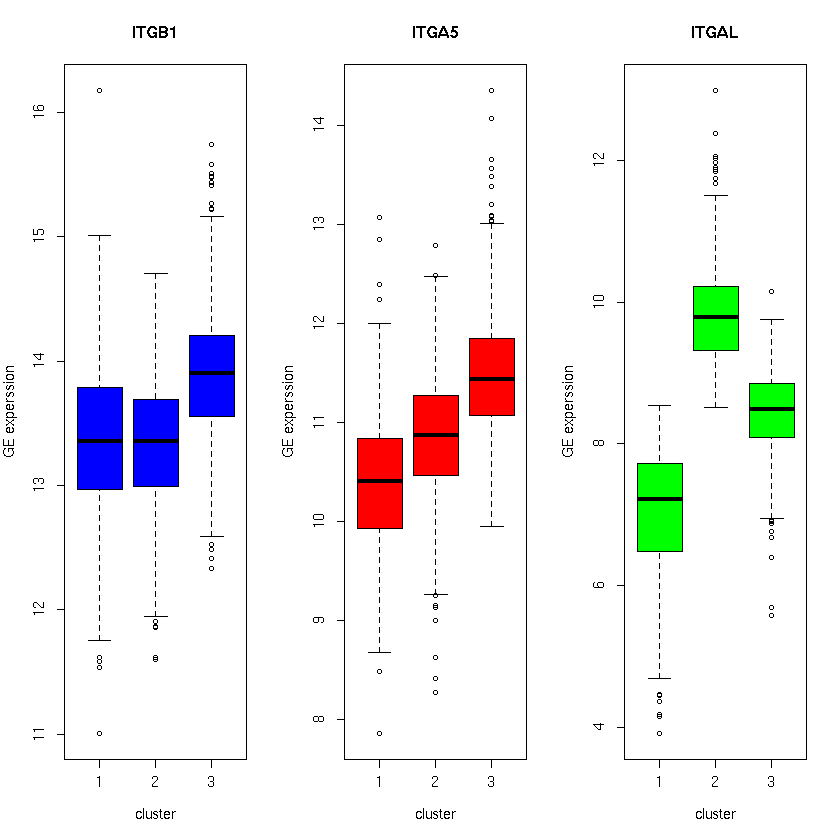

In [21]:
integrin.select=integrin[,c("ITGB1", "ITGA5", "ITGAL")] 
 
set.seed(240) # Setting seed 
kmeans.re2 <- kmeans(integrin.select, centers = 2, nstart = 20) 
kmeans.re2 # 38.1% 
set.seed(240) 
kmeans.re3 <- kmeans(integrin.select, centers = 3, nstart = 20) 
kmeans.re3 # 51.4% 
GEdata=cbind(integrin.select,cluster=kmeans.re3$cluster) 
par(mfrow=c(1,3)) 
boxplot(GEdata$ITGB1 ~ GEdata$cluster, 
         col='blue', 
         xlab='cluster', 
         ylab='GE experssion', 
         main='ITGB1')  
 
boxplot(GEdata$ITGA5 ~ GEdata$cluster,
        col='red', 
        xlab='cluster', 
        ylab='GE experssion', 
        main='ITGA5')  
 
boxplot(GEdata$ITGAL ~ GEdata$cluster, 
         col='green', 
         xlab='cluster', 
         ylab='GE experssion', 
         main='ITGAL')

In [22]:
require(MASS)
GEdata=cbind(integrin.select,cluster=kmeans.re3$cluster) 
require(rgl) 
options(jupyter.plot_mimetypes = 'image/png')
#plot3d(df$X1, df$X2, df$X3, col=as.numeric(df$fac)) 
print(plot3d(GEdata$ITGB1,GEdata$ITGA5,GEdata$ITGAL,col=as.numeric(GEdata$cluster), col.axis = "blue",col.grid = "lightblue", main = "", pch = 20))
set.seed(240)   
kmeans.re4 <- kmeans(integrin.select, centers = 4, nstart = 20) 
kmeans.re4 # 60.7%

Loading required package: MASS

Loading required package: rgl



K-means clustering with 4 clusters of sizes 186, 364, 332, 336

Cluster means:
     ITGB1    ITGA5     ITGAL
1 13.52199 10.63961  6.593914
2 14.03961 11.68779  8.487608
3 13.43268 11.08145 10.188618
4 13.20544 10.40326  8.605221

Clustering vector:
   [1] 2 2 2 3 4 2 2 2 3 3 4 1 2 3 3 3 2 2 2 1 4 2 3 2 3 1 3 4 1 2 4 4 4 1 2 4 2
  [38] 3 2 2 2 1 2 4 4 3 3 3 2 4 2 2 3 3 4 2 2 1 2 4 1 4 3 2 3 4 4 1 1 1 1 4 3 2
  [75] 1 1 1 2 3 4 2 3 4 2 1 1 4 3 4 4 4 2 4 2 1 3 3 4 2 4 4 3 1 2 4 3 4 3 2 2 4
 [112] 3 4 4 4 2 4 2 4 1 3 4 1 3 2 3 2 1 3 4 2 3 4 3 2 3 1 4 4 3 4 4 2 4 3 4 3 1
 [149] 2 4 4 3 4 4 2 2 2 1 2 1 4 3 3 1 4 4 2 2 2 3 1 3 4 3 3 1 1 3 2 1 2 4 2 4 1
 [186] 3 1 2 4 3 2 3 4 4 2 1 4 2 3 4 3 3 2 1 2 4 2 3 4 3 2 2 3 3 1 4 4 4 2 1 4 1
 [223] 4 4 3 4 2 2 3 1 1 3 4 2 2 4 2 2 3 2 3 2 1 1 1 4 3 3 1 2 4 3 2 3 1 1 2 3 2
 [260] 4 1 4 4 3 4 1 2 3 3 3 4 4 4 3 3 4 2 4 3 2 2 3 3 3 2 4 3 4 3 1 2 2 1 4 2 4
 [297] 4 3 3 3 1 2 2 2 2 4 4 4 3 1 3 3 2 4 4 3 3 1 4 2 4 4 4 3 3 4 2 2 2 4 2 4 2
 [334] 4 2 2 4 1 4 2 2

Call:
survdiff(formula = km ~ cluster, data = survdata)

n=1184, 34 observations deleted due to missingness.

            N Observed Expected (O-E)^2/E (O-E)^2/V
cluster=1 253       25     22.6     0.263     0.338
cluster=2 460       19     42.7    13.140    22.244
cluster=3 471       61     39.8    11.354    18.385

 Chisq= 24.9  on 2 degrees of freedom, p= 4e-06 

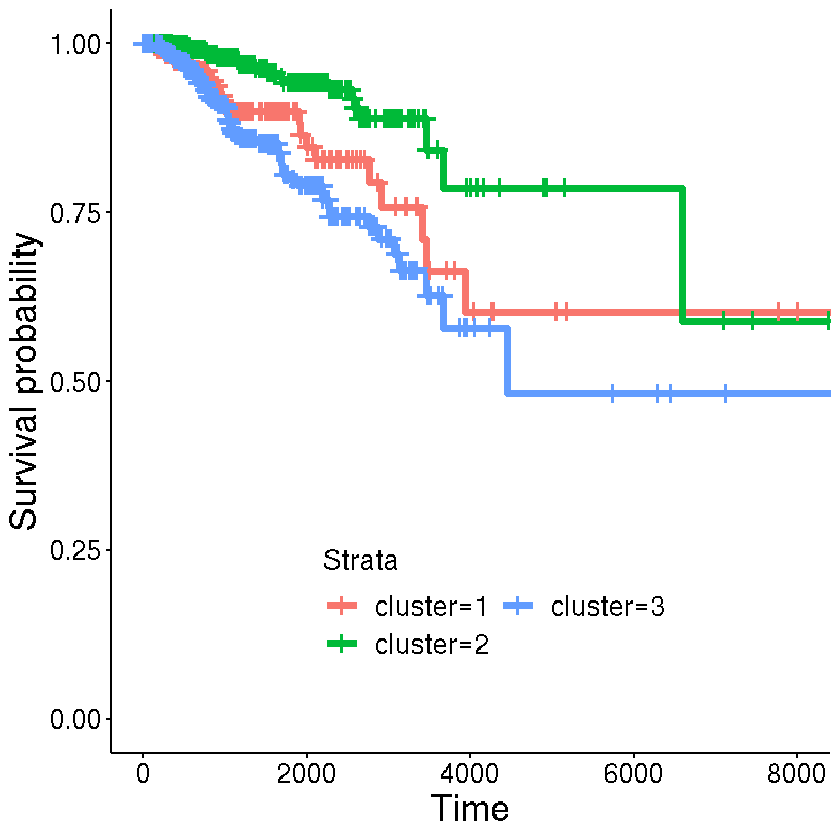

In [22]:
#png("normal_data_ggsurvplot_clusters.png", units="in", width=4.5,height=4, res=400,type='cairo')


survdata=cbind(dat,cluster=kmeans.re3$cluster) #First setup survival object
km <- Surv(time = survdata[,"DSS.time"], event = survdata[,"DSS"]) 
km_treatment<-survfit(km~cluster,data=survdata,type='kaplan-meier',conf.type='log')
survdiff(km ~ cluster,data=survdata)
p <- ggsurvplot(km_treatment,conf.int = 'FALSE', censor.size=8,size = 2)+guides(colour = guide_legend(nrow = 2))

ggpar(p,
      font.x = c(22),
      font.y = c(22), 
      legend=c(0.53,0.2),
      font.legend = c(17), 
      font.tickslab = c(17))
#dev.off()